<a href="https://colab.research.google.com/github/SanghunOh/test_deeplearning/blob/main/reuters_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
 (x_train, y_train),(x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)
 x_train.shape, y_train.shape, x_test.shape, y_test.shape

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [ ]:
print(y_train[50], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [ ]:
len(x_train[50]), len(x_train[400]), len(x_train[200])

(118, 90, 212)

In [ ]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[50])

500

In [ ]:
import numpy as np

In [ ]:
np.unique(y_train).shape, np.unique(y_train)

((46,),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]))

# make model

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Embedding(input_length=500, input_dim=10000, output_dim=24)) # input layer
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))
# model.add(tf.keras.layers.Flatten()) # hidden layer
model.add(tf.keras.layers.Dense(46, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) # gadget

In [ ]:
# hist = model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3, batch_size=128)
hist = model.fit(pad_x_train, y_train, epochs=100, validation_split=0.3, batch_size=256)

# Evaluation

In [ ]:
# 학습 시켰던 데이터
model.evaluate(pad_x_train, y_train) # loss: 2.4050 - acc: 0.3517

281/281 [==============================] - 17s 60ms/step - loss: 1.0556 - acc: 0.7612


[1.0555883646011353, 0.7611890435218811]

In [ ]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [ ]:
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [ ]:
pad_make_x = pad_make(x_test)

In [ ]:
model.evaluate(pad_make_x, y_test)

71/71 [==============================] - 4s 61ms/step - loss: 2.2888 - acc: 0.5436


[2.2887823581695557, 0.5436331033706665]

In [ ]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 4s 61ms/step - loss: 2.2888 - acc: 0.5436


[2.2887823581695557, 0.5436331033706665]

In [ ]:
import matplotlib.pyplot as plt

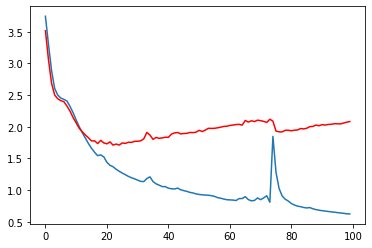

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'r-')
plt.show()

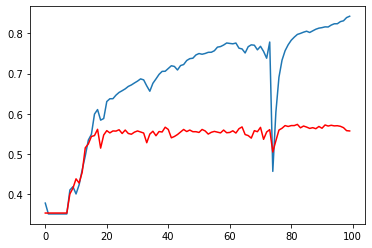

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'r-')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_train_pred = model.predict(pad_x_train)
y_train_pred[0]

array([2.3599685e-05, 6.4659846e-04, 2.1095653e-05, 9.6035951e-01,
       1.3627972e-02, 1.6908951e-05, 2.0542928e-05, 7.2627782e-04,
       1.5232650e-03, 3.2416228e-05, 7.8989670e-04, 2.9844340e-04,
       1.6205687e-04, 1.7517888e-05, 1.1438169e-05, 6.6561370e-05,
       4.2046402e-03, 2.6136526e-05, 1.1083510e-04, 8.2320627e-03,
       5.0825789e-04, 1.7248117e-04, 1.1577784e-04, 1.4794772e-04,
       1.8548229e-05, 6.8179157e-05, 2.3309521e-04, 1.5344305e-04,
       1.3643962e-03, 2.7715793e-04, 1.5480433e-03, 6.3865227e-05,
       1.5689993e-04, 1.5730837e-04, 1.6178386e-03, 2.6454212e-04,
       1.6141722e-04, 4.5877812e-05, 3.3404061e-04, 1.1292896e-03,
       4.0145223e-05, 1.7158301e-05, 1.3960039e-04, 1.2763334e-04,
       1.6330127e-04, 5.5813354e-05], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
y_pred = np.argmax(y_train_pred, axis=1)
y_pred.shape

(8982,)

In [ ]:
len(y_train)

8982

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
y_test_pred = model.predict(pad_x_test)

In [ ]:
y_pred = np.argmax(y_test_pred, axis=1)

In [ ]:
print(classification_report(y_test, y_pred))

# Service
TOKYO, Aug 6 (Reuters) - Two Belarus coaches who cut short sprinter Krystsina Tsimanouskaya's Tokyo Games have had their accreditation revoked and were removed from the athletes village, the IOC said on Friday.

In [ ]:
# 문장 입력
# --> 숫자(사전을 기준) --> [, , , , ...] --> pad_sequence

model.predict()